In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from sklearn.datasets import make_moons, make_blobs

In [54]:
X, y = make_moons(500, noise=0.1)
print X.shape, y.shape

def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

(500, 2) (500,)


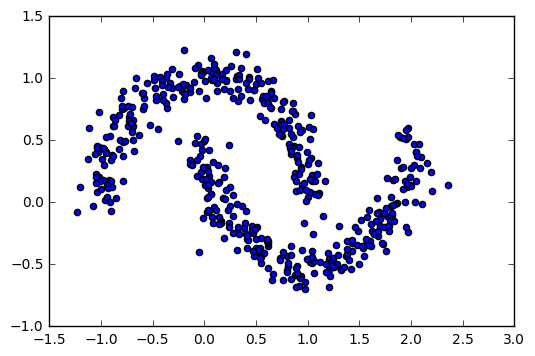

In [55]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [36]:
z = np.array([0.25, 1.64, 0.98, 0.45])
print z
escore = np.exp(z)
print escore
print escore.sum()
probs = escore / escore.sum()
print probs


[ 0.25  1.64  0.98  0.45]
[ 1.28402542  5.15516951  2.66445624  1.56831219]
10.6719633563
[ 0.12031764  0.48305727  0.2496688   0.14695629]


In [56]:
num_examples = X.shape[0]
nn_input_dim = 2
nn_output_dim = 2

epsilon = 0.01
reg_lambda = 0.01

In [53]:
print y[:10]

[0 1 0 1 1 0 1 0 0 1]


In [87]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-1.0 * z))

def d_sigmoid(z):
    y = sigmoid(z)
    return y*(1 - y)

def tanh(z):
    return np.tanh(z)

def d_tanh(z):
    return (1.0 - np.tanh(z)**2)

def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = X.dot(W1) + b1
    # a1 = np.tanh(z1)
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    return 1./num_examples * data_loss


def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = x.dot(W1) + b1
    # a1 = np.tanh(z1)
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

def build_model(nn_hdim=16, nb_epoch=10000, print_loss=True, model=None):
    
    # Initialize weights and biases
    if model is None:
        W1 = np.random.randn(nn_input_dim, nn_hdim)
        b1 = np.zeros((1, nn_hdim))
        W2 = np.random.randn(nn_hdim, nn_output_dim)
        b2 = np.zeros((1, nn_output_dim))
    else:
        W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Init model object
    if model is None:
        model = {}
    
    for i in xrange(0, nb_epoch):

        # Forward propagation, store vals
        
        z1 = X.dot(W1) + b1
        a1 = sigmoid(z1)
        # a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        a2 = probs
        
        # Backpropagation
        delta3 = probs
        # compute loss gradient
        delta3[range(num_examples), y] -= 1
        
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        
        # delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        delta2 = delta3.dot(W2.T) * (1 - a1) * a1 # gradient for sigmoid
        
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0,keepdims=True)

        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        if print_loss and i % 10 == 0:
            print "Loss after iteration %i: %f" %(i, calculate_loss(model))
    
    return model

Loss after iteration 0: 0.012253
Loss after iteration 10: 0.011802
Loss after iteration 20: 0.011386
Loss after iteration 30: 0.011003
Loss after iteration 40: 0.010648
Loss after iteration 50: 0.010318
Loss after iteration 60: 0.010010
Loss after iteration 70: 0.009723
Loss after iteration 80: 0.009453
Loss after iteration 90: 0.009200


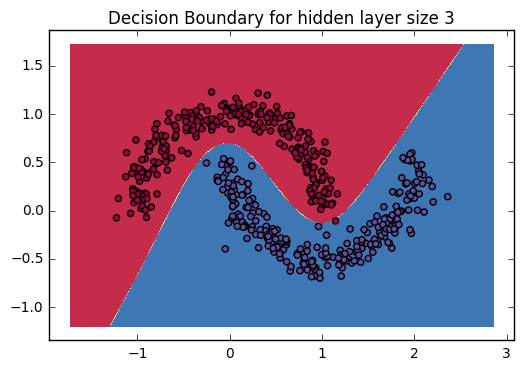

In [90]:
model = build_model(16, nb_epoch=100, print_loss=True, model=model)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")
plt.show()